# Assignment 2 

## Question 1: Data Cleaning

- Find missing values and either fill them or delete entire column
- Encode all categorical data
- only a few features will be deleted in this section, most of the feature selection will be done in question 2. 

All data cleaning that is being done is going to be done on the whole data set

In [1]:
#importing all needed libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

from sklearn.multiclass import OneVsRestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report 
import warnings 

from sklearn.model_selection import GridSearchCV

In [2]:
import warnings
#filtering out the warning pop ups 
warnings.filterwarnings("ignore")

##### Importing the Data

In [3]:
#reading the csv file 
df = pd.read_csv('clean_kaggle_data_2020.csv')

In [4]:
#outputting the first 5 rows of the dataframe
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER,Q24_Encoded,Q24_buckets
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...",NaN,NaN
1,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,"100,000-124,999"
2,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,1.0,"10,000-19,999"
3,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,"125,000-149,9991"
4,762,35-39,Man,Germany,Doctoral degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,"70,000-79,999"


In [5]:
#outputting the questions from the survey. using display.max_rows to show all the questions
#pd.set_option('display.max_rows', None)
#df.iloc[0]

#this part is commented out as it outputs a very long list and was only used for preparation. no actual actions were done to the data in these lines

In [6]:
#deleting the first row - the row with the survey questions
df.drop(df.head(1).index, inplace=True)

In [7]:
#finding the size of the data file
df.shape

(10729, 357)

In [8]:
#deleting the column Time from start to finish as it is irreleant to the actual survey and the target variable
del df[("Time from Start to Finish (seconds)")]

In [9]:
df.columns[df.isnull().any()]

Index(['Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3', 'Q7_Part_4', 'Q7_Part_5',
       'Q7_Part_6', 'Q7_Part_7', 'Q7_Part_8', 'Q7_Part_9', 'Q7_Part_10',
       ...
       'Q35_B_Part_2', 'Q35_B_Part_3', 'Q35_B_Part_4', 'Q35_B_Part_5',
       'Q35_B_Part_6', 'Q35_B_Part_7', 'Q35_B_Part_8', 'Q35_B_Part_9',
       'Q35_B_Part_10', 'Q35_B_OTHER'],
      dtype='object', length=344)

### Filling in missing values 

Since there are still columns that have missing values we will be doing the following: 
- If there is more than 50% missing values then we will drop those columns directly
- if there is <50% missing values we will fill those values with the mode.

Many of the missing data is because most of the questions in the survey are multiple choice questions. This means that even though there is only one 'Q7" there are many parts to it because there are multiple answers the user can pick from. Therefore, these values are not technically 'missing' the parts of the question are split up to only have values where that specific selection is called (for. ex selection of 'Python' for programming language). Therefore, for these 'missing' values we can search the column names that have "Part" or "OTHER" in them indicating that they are a multiple choice question and assign the values to 1 and the 'missing' values to 0. Its the same as if all the multiple choice answers were all under Q7 and we decided to hot encode them. Because the choices are already seperated, we only binarize the columns

Encoding Categorical Data: 
- For the columns that have ranges of values we will be using find and replace to replace the ranges with their average and/or 1,2,3 etc depending on what the value are representing (essentially label encoding)
- For the columns with unique values that are not ranges we will be using dummy encoding

In [10]:
# Find the columns with missing values that are from multiple choice questions and replacing 0 and 1 for the values
for col_name in df.columns:
    #if Part or OTHER is in the column name apply the for loop
    if "Part" in col_name or 'OTHER' in col_name:
        df[col_name] = df[col_name].isnull().map({True:0, False:1})
    #finding the amount of null entries related to total entries 
    null_n = len(df[df[col_name].isnull()])
    #if theres null values, print out from where, how many and the percentage
    if null_n:
        print(col_name, null_n, null_n / df.shape[0])

Q8 561 0.052288190884518596
Q11 561 0.052288190884518596
Q13 561 0.052288190884518596
Q15 561 0.052288190884518596
Q25 159 0.014819647683847517
Q30 7216 0.6725696709851804
Q32 9231 0.8603784136452605
Q38 1253 0.11678628017522602


Here it is notable that Q32 and Q30 have more than 50% missing data. 
Columns Q8,Q11,Q13,Q15,Q25, and Q38 are all lower than 15% so if appropriate, their missing values will be filled with the columns mode. This can affect the model results however it is deemed appropriate at this step. 

In [11]:
# Deleting the columns that have more than 50% of missing values 
percent_missing = df.isnull().sum() / len(df)
missing_features = percent_missing[percent_missing > 0.50].index
df.drop(missing_features, axis=1, inplace=True)

In [12]:
#replacing missing values with mode

#replacing the missing values in Q8 with the mode
for column in ['Q8']:
    df[column].fillna(df[column].mode()[0], inplace=True)
    
#replaceing the missing values in Q38 with the mode
for column in ['Q38']:
    df[column].fillna(df[column].mode()[0], inplace=True)

#replacing the missing values in Q15 with the mode
for column in ['Q15']:
    df[column].fillna(df[column].mode()[0], inplace=True)
    
#replaceing the missing values in Q11 with the mode
for column in ['Q11']:
    df[column].fillna(df[column].mode()[0], inplace=True)
    
#replaceing the missing values in Q13 with the mode
for column in ['Q13']:
    df[column].fillna(df[column].mode()[0], inplace=True)

#replaceing the missing values in Q25 with the mode
for column in ['Q25']:
    df[column].fillna(df[column].mode()[0], inplace=True)

### Encoding

There are many types of encoding methods such as Find and Replace, Label Encoding, One Hot Encoding, Dummy Encoding and more. 

A version of 'Find and Replace' was used for Q1,Q6,Q15,Q13,Q20,Q21,Q25 as these questions involed ranges as answers. Instead of labelling them in numeric order (1,2,3,4,5) i used the average number or so for each range to better represent that range. Find and Replace was used here as it made more sense than the other methods as these columns still contain numeric values, they are just in a range format. Label encoding assumes an order to the values and that can sometimes be a problem when values do not have an order to them (example: python and R). However, for the columsn listed here, they are numeric ranges, therefore label encoding could have also been used.

#### Find and Replace

In [13]:
#Find and Replace

#converting age ranges to their averages to give an idea when looking at the data the range they are in 
Q1 = {'18-21':19, '22-24':23, '25-29':27, '30-34':32, '35-39':37, '40-44':42, '45-49':47, '50-54':52, '55-59':57, 
         '60-69':64, '70+':70}
df['Q1'] = df['Q1'].map(Q1)

#converting years of experience to relatively the middle number of each range
Q6 = {'I have never written code':0, '< 1 years':1, '1-2 years':2, '3-5 years':4,
          '5-10 years':8, '10-20 years':16,'20+ years':17}
df['Q6'] = df['Q6'].map(Q6)

Q15 = {'I do not use machine learning methods':0, 'Under 1 year':1, '1-2 years':2, '2-3 years':3,
          '3-4 years':4, '4-5 years':5,'5-10 years':8, '10-20 years':16, '20 or more years':17}
df['Q15'] = df['Q15'].map(Q15)

Q13 = {'Never':0, 'Once':1, '2-5 times':3, '6-25 times':15,
          'More than 25 times':16}
df['Q13'] = df['Q13'].map(Q13)

Q20 = {'0-49 employees':0, '50-249 employees':1, '250-999 employees':2, '1000-9,999 employees':3,
          '10,000 or more employees':4}
df['Q20'] = df['Q20'].map(Q20)

Q21 = {'0':0, '1-2':1, '3-4':2, '5-9':3,
          '10-14':4, '15-19': 5, '20+':6}
df['Q21'] = df['Q21'].map(Q21)

Q25 = { "$0 ($USD)":0, "$1-$99":1, "$100-$999":2, "$1000-$9,999":3,
          "$10,000-$99,999":4, "$100,000 or more ($USD)": 5}
df['Q25'] = df['Q25'].map(Q25)


There are many columns that, after encoding had the same title such as 'Other.' To combat this issue, i replaced all the other columns with their corresponding question to differentiate them. 

In [14]:
#replacing 'other' in features to determine which feature it is coming from
df['Q3'].replace(['Other'], 'Other_Country', inplace = True)
df['Q5'].replace(['Other'], 'Other_JobTitle', inplace = True)
df['Q8'].replace(['Other'], 'Other_primarytool', inplace = True)
df['Q11'].replace(['None'], 'None_computing_platform', inplace = True)

In [15]:
#making sure no values are null anymore
df.columns[df.isnull().any()]

Index([], dtype='object')

### Country Data

There are about 55 different countries that are listed in the country column (Q3). To label encode this data would assume an order and to one hot encode or dummy encode this data would cause the dataframe to become too large. Therefore, after taking a look at the value counts of each country it was deemed appropriate to keep India and United States of America as values and then group all the other countries into the 'Other Country' column as they have significantly smaller value counts. 

Doing this then allows us to One Hot Code this column so that only 3 columns are added instead of roughly 55. 

In [16]:
df['Q3'].value_counts()

India                                                   2353
United States of America                                1484
Other_Country                                            815
Brazil                                                   443
Japan                                                    385
Russia                                                   351
United Kingdom of Great Britain and Northern Ireland     350
Germany                                                  256
Nigeria                                                  246
Spain                                                    234
Canada                                                   198
France                                                   197
Italy                                                    184
China                                                    166
Turkey                                                   166
Australia                                                147
Mexico                  

In [17]:
# Change the rest of the countries as Other
countries = ["India", "United States of America"]
df["Q3"]=df["Q3"].apply(lambda x: x if x in countries else "Other_Country")

#### One Hot Encoding

For Q2,Q3,Q4,Q5,Q11,Q22, and Q38 One Hot encoding using the binary strategy was used. The binary strategy essentially means that each category value was converted into a new column and assigned 1 or 0 based on that columns encoded value. 

In [18]:
#One hot encoding

catecols = ['Q2', 'Q4', 'Q8', 'Q3', 'Q5', 'Q22', 'Q38', 'Q11']
for col in catecols: 
    dfeat = pd.get_dummies(df[col], prefix=col, drop_first=True)
    #adding the new feature to the dataframe
    df = pd.concat([df, dfeat], axis=1)
    #dropping the original feature column
    df.drop(col, axis=1, inplace=True)

In [19]:
#checking to make sure there are no more missing values
df.columns[df.isnull().any()]

Index([], dtype='object')

In [20]:
#looking to see what all the unique values are in Q24 - these are the target variables
df['Q24_buckets'].unique()

array(['100,000-124,999', '10,000-19,999', '125,000-149,9991',
       '70,000-79,999', '30,000-39,999', '90,000-99,999', '0-9,999',
       '150,000-199,999', '60,000-69,999', '>250,000', '40,000-49,999',
       '20,000-29,999', '80,000-89,999', '50,000-59,999',
       '200,000-249,999'], dtype=object)

Deleting Q24 and Q24_buckets as they are not integers and the Q24_encoded feature already represents the salary ranges
Ranges: 
- 0 : 0-9,999
- 1: 10,000 - 19,999
- 2: 20,000 - 29,999
- 3: 30,000 - 39,999
- 4: 40,000 - 49,999
- 5: 50,000 - 59,999
- 6: 60,000 - 69,999
- 7: 70,000 - 79,999
- 8: 80,000 - 89,999
- 9: 90,000 - 99,999
- 10: 100,000 - 124,999
- 11: 125,000 - 149,999
- 12: 150,000 - 199,999
- 13: 200,000 - 249,999
- 14: >250,000

In [21]:
del df['Q24']

In [22]:
del df['Q24_buckets']

In [23]:
df['Q24_Encoded'] = df['Q24_Encoded'].astype(int) 

In [24]:
#viewing the new data frame with the data cleaning
df.head()

,Q1,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,...,Q22_We use ML methods for generating insights (but do not put working models into production),"Q38_Basic statistical software (Microsoft Excel, Google Sheets, etc.)","Q38_Business intelligence software (Salesforce, Tableau, Spotfire, etc.)","Q38_Cloud-based data software & APIs (AWS, GCP, Azure, etc.)","Q38_Local development environments (RStudio, JupyterLab, etc.)",Q38_Other,"Q11_A deep learning workstation (NVIDIA GTX, LambdaLabs, etc)",Q11_A personal computer or laptop,Q11_None_computing_platform,Q11_Other
1,32,8,1,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,37,16,0,0,0,0,0,1,1,0,...,0,1,0,0,0,0,0,1,0,0
3,32,8,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,37,8,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,37,2,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0


### Centering and Scaling the Data

Since the data does contain some columns that are of different units of measurement, centering and scaling the data can be appropriate. 
In this case, a lot of the data is binary, in these types of dataframes typically there is no need for scaling the data since most of the values are either 1 or 0.

## Question 2: Exploratory data analysis and feature selection
In question one only a few features were removed that we know have almost no correlection to salary therefore even if it may affect the analysis a little, it is acceptable. 
In this section we will 
- visusalize the order of feature importance (correlation plot or similar method)
- find which original attributes in the data are most related to a survey respondents yearly compensation
- apply feature engineering and select the features to be used for analysis either manually or through some feature selection algorithm (one feature technique will atleast be used)

2.1 Creating a Correlation Plot

In [25]:
#Prepare a correlation plot by creating the dataframe
corr = df.corr()
corr.head()

,Q1,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,...,Q22_We use ML methods for generating insights (but do not put working models into production),"Q38_Basic statistical software (Microsoft Excel, Google Sheets, etc.)","Q38_Business intelligence software (Salesforce, Tableau, Spotfire, etc.)","Q38_Cloud-based data software & APIs (AWS, GCP, Azure, etc.)","Q38_Local development environments (RStudio, JupyterLab, etc.)",Q38_Other,"Q11_A deep learning workstation (NVIDIA GTX, LambdaLabs, etc)",Q11_A personal computer or laptop,Q11_None_computing_platform,Q11_Other
Q1,1.000000,0.526335,-0.126893,0.075319,0.013864,0.005109,-0.011399,-0.006942,0.010735,0.020553,...,0.013340,0.034343,-0.012681,-0.018809,-0.067746,0.029247,0.016476,-0.000779,-0.014053,0.046710
Q6,0.526335,1.000000,0.087820,0.082225,0.162154,0.126365,0.132864,0.146959,0.153622,0.073532,...,0.020863,-0.084173,-0.040339,0.057038,0.029635,0.042022,0.082464,-0.149246,-0.019898,0.096408
Q7_Part_1,-0.126893,0.087820,1.000000,-0.008820,0.152585,0.066780,0.096250,0.061770,0.060556,0.016232,...,0.029425,-0.072173,-0.001396,0.061918,0.086410,-0.018577,0.092081,-0.144641,-0.084419,0.021150
Q7_Part_2,0.075319,0.082225,-0.008820,1.000000,0.134431,-0.002212,-0.020180,-0.050314,-0.052433,0.076550,...,0.072797,-0.158509,-0.015440,-0.035789,0.138723,-0.051977,-0.022740,0.024583,-0.045596,0.021609
Q7_Part_3,0.013864,0.162154,0.152585,0.134431,1.000000,0.035051,0.025453,0.164022,0.197104,0.018104,...,0.021592,-0.078430,0.108628,0.063460,0.002846,-0.027404,-0.050218,-0.052819,-0.010832,0.014940


<AxesSubplot:>

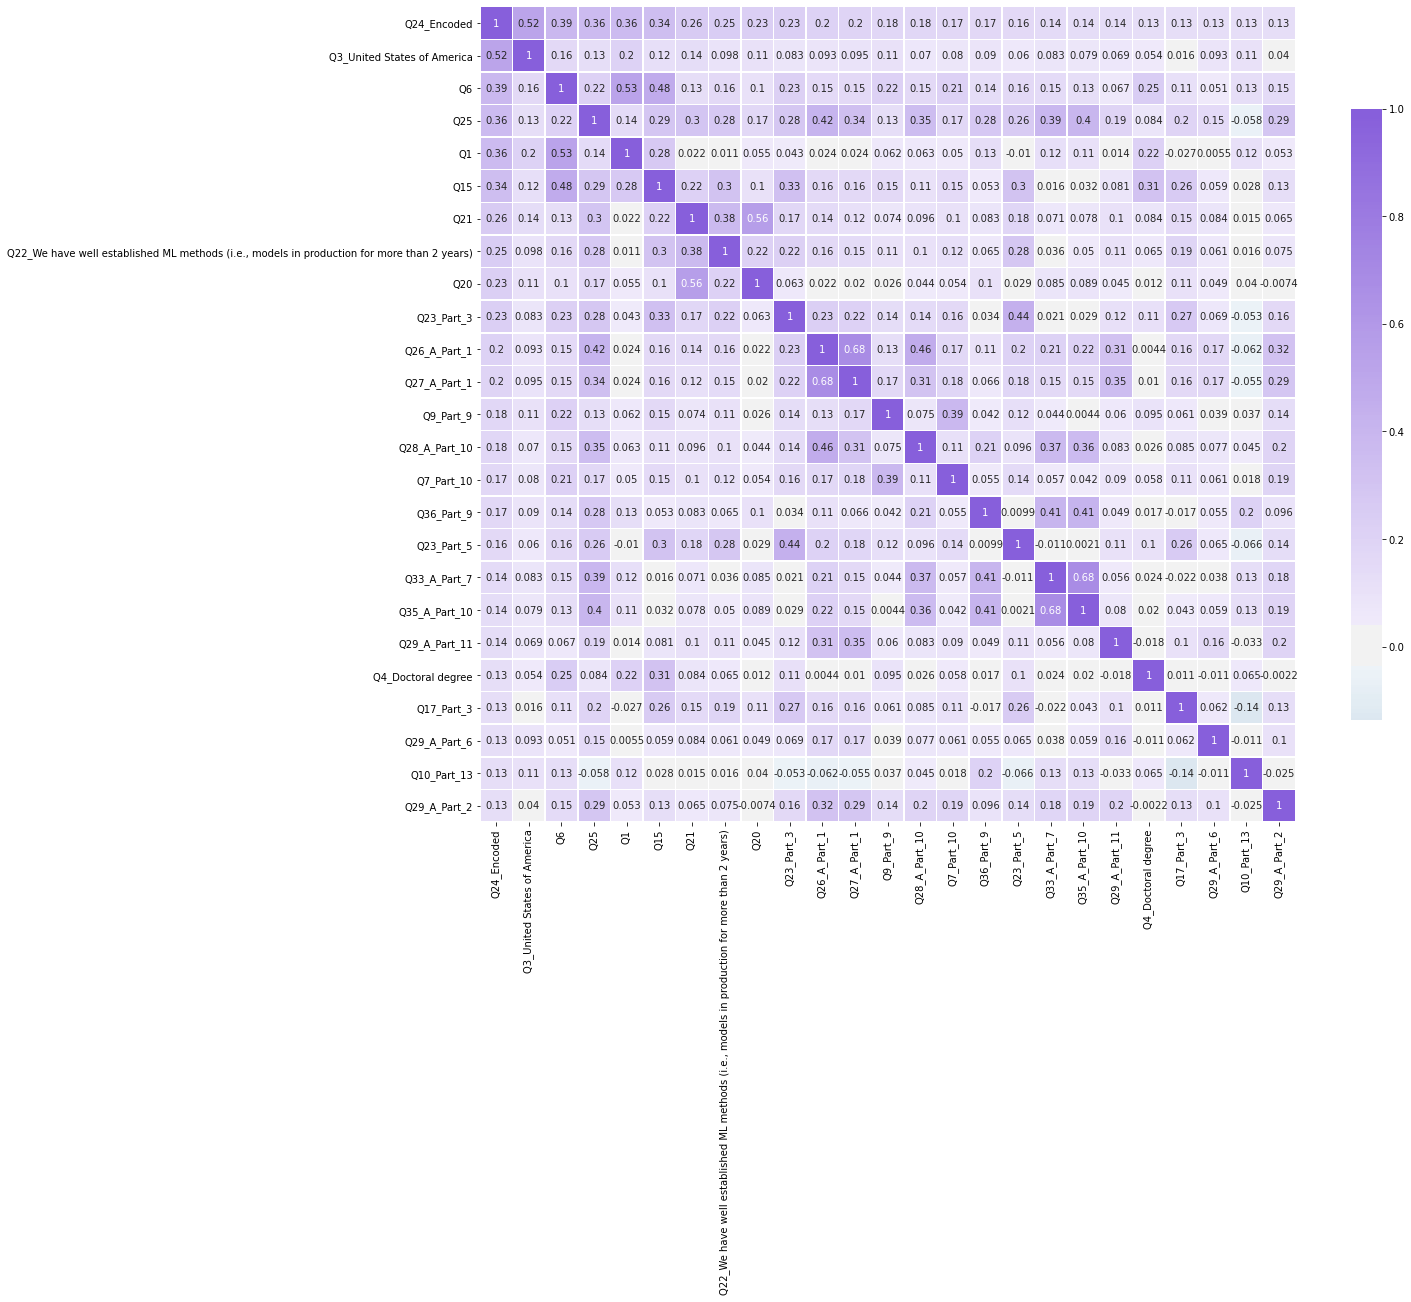

In [26]:
#plotting the correlation plot 

#selecting the Q24_Encoded feature as this is the encoded salary range data
corr_Q24 = corr['Q24_Encoded']

#creating the correlation plot with matplotlib library
corrplot, ax = plt.subplots(figsize=(20,15))
#creating a list of the top 25 most correlated features to the encoded salary data
top25 = list(corr_Q24.nlargest(25).index)
corr = corr.loc[top25, top25]

#creating a heatmap to better visualize the correlation
sns.heatmap(corr, cmap = sns.diverging_palette(240, 275, n=295),vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .75}, annot=True)


Based off the correlation plot, the following attributes in the data are most related to a  survey respondents yearly compensation: 
1. Q3 - In which country did you reside? ANS: United States of America
2. Q6 - For how many years have you been writing code and/or programming?
3. Q25 - Approximately how much money have you (or your team) spend on machien learning and/or cloud computing services at home (or at work) in the past 5 years (approx $USD)
4. Q1 - What is your age? 
5. Q15 - For how many years have you used machien learning methods? 
6. Q21 - Approximately how many individuals are responsible for data science workloads at your place of business? 
7. Q22 - Does your current employer incorpoate machine learning methods into their business? ANS: We have well establisehd ML methods (ie models in production for more than 2 years)
8. Q20 - What is the size of the company where you are employed?
9. Q23_Part_3 - Select any activities that make up an important part of your role at work: ANS: Built prototypes to explore applying machine learning to new areas
10. Q26_A_Part_1 - Which of the following cloud computing platforms do you use on a regular basis? ANS: Amazon Web Services (AWS)


In [27]:
pip install seaborn==0.10.0.rc0

Note: you may need to restart the kernel to use updated packages.


### Feature Selection

Feature selection is used to minimize the number of input variables one needs for a model to predict the target variable. There are many different techniques for feature selection. When deciding what type of feature selection technique you want to use, one must note the type of variables they have for their input and output. There are methods for feature selection that are better for a model with numerical inputs and numerical outputs than for a model with categorical inputs and categorical outputs (for example). 

The feature selection technique that was used in this model is Mutual Information with select K Best. Mutual information measures teh dependencies between the variables. When tow variables are independent from each other than the score is 0 and higher values mean higher dependency between the variables. The Select K best feature selection will then select the 20 best features based on the mutual information score. 

In [28]:
# Seperating the dataset first into the feature dataframe and target variable (for now we will be using Q24_Encoded but the true target variable is Q24_buckets)
x = df.drop(['Q24_Encoded'],axis=1)
y = df['Q24_Encoded']

In [29]:
x = pd.DataFrame(x)
y = pd.DataFrame(y)

In [30]:
#Feature selection techniques 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

# define feature selection
fs = SelectKBest(score_func = mutual_info_classif,k=20)
#apply feature selection
x = fs.fit_transform(x, y)
print(x.shape)

(10729, 20)


In [31]:
x = pd.DataFrame(x)

## Q3: Model Implementation

Ordinal Logisitc Regression on the training set using 10-fold cross-validation.

1. The dataset is first split into training sets and tests sets
2. The model is implemented 
3. The feature data sets (x_train, x_test) are scaled
4. Each of the folds are printed with their corresponding accuracy and then the average accuracy and standard deviation
    - accuracy score from sklearn is used to calculate the accuracy score 


In [32]:
# Splitting the dataset into training and testing sets 
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)

In [33]:
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [34]:
#applying logisitic regression (refer to assignment 2 pdf for explanation of why this was used)
model = OneVsRestClassifier(LogisticRegression()) 
scaler = StandardScaler()

#10 fold 
kfold = KFold(n_splits=10)
kfold.get_n_splits(x)

accuracy = np.zeros(10)
np_idx = 0

#creating the folds 
for train_idx, test_idx in kfold.split(x):
    x_train, x_test = x.values[train_idx], x.values[test_idx]
    y_train, y_test = y.values[train_idx], y.values[test_idx]
    
    #scaling the data
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    
    #fitting the data to the training set
    model.fit(x_train, y_train)
    
    predictions = model.predict(x_test)
    
    ACC = accuracy_score(y_test, predictions)
    
    accuracy[np_idx] = ACC*100
    np_idx += 1
    
    print ("Fold {}: Accuracy: {}%".format(np_idx, round(ACC,3)))   

print ("Average Score: {}%({}%)".format(round(np.mean(accuracy),3),round(np.std(accuracy),3)))
print('\n')
print("\nR2 Score:", r2_score(y_test, predictions))
print("\nMAE:", mean_absolute_error(y_test, predictions))
print("\nMSE:", mean_squared_error(y_test, predictions))
print("\nRMSE:", np.sqrt(mean_squared_error(y_test, predictions)))
print('\n')
#performance measurements of the original model
print(classification_report(y_test, predictions)) 

Fold 1: Accuracy: 0.436%
Fold 2: Accuracy: 0.456%
Fold 3: Accuracy: 0.414%
Fold 4: Accuracy: 0.432%
Fold 5: Accuracy: 0.421%
Fold 6: Accuracy: 0.429%
Fold 7: Accuracy: 0.424%
Fold 8: Accuracy: 0.421%
Fold 9: Accuracy: 0.416%
Fold 10: Accuracy: 0.442%
Average Score: 42.912%(1.227%)



R2 Score: 0.08803728199293648

MAE: 2.308768656716418

MSE: 14.987873134328359

RMSE: 3.8714174580285654


              precision    recall  f1-score   support

           0       0.50      0.96      0.66       459
           1       0.15      0.04      0.06       114
           2       0.00      0.00      0.00        67
           3       0.20      0.02      0.03        60
           4       0.00      0.00      0.00        48
           5       0.08      0.04      0.05        47
           6       0.00      0.00      0.00        37
           7       0.00      0.00      0.00        44
           8       0.00      0.00      0.00        28
           9       0.00      0.00      0.00        26
          10 

The average accuracy score is 42.716% with a standard deviation of 1.43%. 
The accuracy score accross the folds stayed pretty consistent ranging from 0.413% - 0.45% 

## Q4 Model Tuning

Here all the hyperparameters of our model are given and then 2 are selected for hyperparameter tuning. The 2 that were chose for hyperparameter tuning were solver and C as those tend to have a big impact on the model when different spcifications/metrics are given. 

The optimal model will be created based off the results from using GridSearch. Performance measures using classification-report in sklearn will be used to explain the performance of the models and their differences/improvements. 

In [35]:
#outputting all the parameters
model.get_params

<bound method BaseEstimator.get_params of OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          n_jobs=None)>

In [36]:
#setting up gridsearchCV with CV to see which values of hyperparameters will perform the best

parameters = {
    "estimator__C": [0.001,0.01,0.05,0.1,0.5,1,5,10, 100],
    "estimator__solver": ['newton-cg','lbfgs','liblinear','sag']
}


logr = OneVsRestClassifier(LogisticRegression()) 

grid = GridSearchCV(estimator=logr, param_grid=parameters, n_jobs= -1)

In [37]:
grid.fit(x_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          n_jobs=None),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'estimator__C': [0.001, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 100], 'estimator__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [38]:
#outputtingthe best parameters to use for our optimal model
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'estimator__C': 0.05, 'estimator__solver': 'liblinear'} with a score of 0.43


In [39]:
optimal_model = OneVsRestClassifier(LogisticRegression(C = 0.05, solver = 'liblinear'))
scaler = StandardScaler()

## Q5 Testing & Discussion

Using the optimal model obtained in Q4 to make predictions on the test set. The dataframe is split again, scaled and the new model is fit to the training set and then used to make predictions for both the train set and test set for comparison. 

In [40]:
x = df.drop(['Q24_Encoded'],axis=1)
y = df['Q24_Encoded']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)

In [41]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

optimal_model.fit(x_train,y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False),
          n_jobs=None)

In [42]:
#predictions for training data and test data 
train_predictions = optimal_model.predict(x_train)
test_predictions = optimal_model.predict(x_test)

In [43]:
#the classification report for the training set
print(classification_report(y_train, train_predictions)) 
print('\n')
print("\nR2 Score:", r2_score(y_train, train_predictions))
print("\nMAE:", mean_absolute_error(y_train, train_predictions))
print("\nMSE:", mean_squared_error(y_train, train_predictions))
print("\nRMSE:", np.sqrt(mean_squared_error(y_train, train_predictions)))
print('\n')

              precision    recall  f1-score   support

           0       0.59      0.92      0.72      3125
           1       0.29      0.14      0.18       787
           2       0.37      0.16      0.22       487
           3       0.35      0.16      0.22       389
           4       0.32      0.16      0.21       385
           5       0.40      0.24      0.30       351
           6       0.41      0.23      0.30       281
           7       0.52      0.27      0.35       255
           8       0.50      0.29      0.37       191
           9       0.52      0.28      0.37       191
          10       0.47      0.45      0.46       400
          11       0.50      0.44      0.47       230
          12       0.55      0.60      0.58       242
          13       0.80      0.63      0.70        89
          14       0.66      0.45      0.53       107

   micro avg       0.54      0.54      0.54      7510
   macro avg       0.48      0.36      0.40      7510
weighted avg       0.49   

In [44]:
#the classification report for the test set 
print(classification_report(y_test, test_predictions)) 
print('\n')
print("\nR2 Score:", r2_score(y_test, test_predictions))
print("\nMAE:", mean_absolute_error(y_test, test_predictions))
print("\nMSE:", mean_squared_error(y_test, test_predictions))
print("\nRMSE:", np.sqrt(mean_squared_error(y_test, test_predictions)))
print('\n')

              precision    recall  f1-score   support

           0       0.55      0.87      0.67      1316
           1       0.13      0.07      0.09       327
           2       0.11      0.04      0.06       227
           3       0.05      0.03      0.04       151
           4       0.05      0.02      0.03       167
           5       0.13      0.08      0.10       159
           6       0.08      0.04      0.05       127
           7       0.09      0.04      0.06       139
           8       0.02      0.01      0.02        82
           9       0.04      0.02      0.03        89
          10       0.17      0.14      0.15       173
          11       0.07      0.07      0.07        85
          12       0.18      0.16      0.17       105
          13       0.00      0.00      0.00        26
          14       0.11      0.09      0.10        46

   micro avg       0.39      0.39      0.39      3219
   macro avg       0.12      0.11      0.11      3219
weighted avg       0.28   

In [45]:
y_test = pd.DataFrame(y_test)
y_train = pd.DataFrame(y_train)
test_predictions = pd.DataFrame(test_predictions)
train_predictions = pd.DataFrame(train_predictions)

Distribution plot of Target Variable

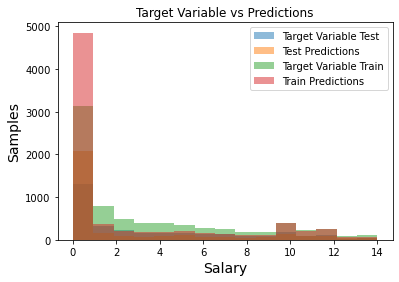

In [46]:
plt.hist(y_test, bins = 15, alpha=0.5, label = "Target Variable Test")
plt.hist(test_predictions, bins = 15, alpha=0.5, label = "Test Predictions")
plt.hist(y_train, bins = 15, alpha=0.5, label = "Target Variable Train")
plt.hist(train_predictions, bins = 15, alpha=0.5, label = "Train Predictions")

plt.xlabel("Salary", size = 14)
plt.ylabel("Samples", size = 14)
plt.title('Target Variable vs Predictions')
plt.legend()

Ordinal Logistic regression classes